Enter how many nodes you want to enter:4
Enter the node: a
Enter the node: b
Enter the node: c
Enter the node: d
Enter how many edges you want to give:4
Now enter them with space separation.
a b
c d
b a
d b
Graph with 4 nodes and 3 edges


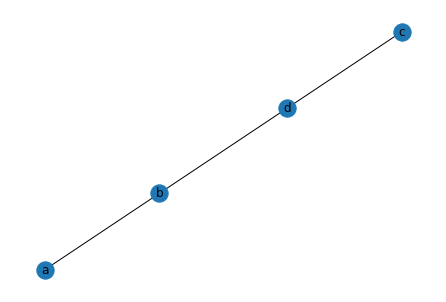

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
class Graph:
    graph = {}
    vertices_no = 0

    open = []
    closed = []
    
    def add_vertex(self, v):
        if v in self.graph:
            print("Vertex " + v + " is already present in graph")
        else:
            self.vertices_no = self.vertices_no + 1
            self.graph[v] = []
            
    def add_edge(self, v1, v2, cost = 1):
        if v1 not in self.graph:
            print("The " + v1 + " is not present in graph")
        elif v2 not in self.graph:
            print("The " + v2 + " is not presend in graph")
        else:
            temp = [v2, cost]
            self.graph[v1].append(temp)
            
    def print_graph(self):
        for vertex in self.graph:
            for edges in self.graph[vertex]:
                print(vertex, " -> ", edges[0], " edge weight: ", edges[1])


#     def create_networkx_graph(self, graph):  # pass dict graph
#         g = nx.Graph()

#         for i in graph.keys(): 
#             # add edges and nodes
#             edges =[]
#             for j in graph[i]:
#                 edge = (i, j[0], j[1])
#             edges.append(edge)

#         return g.add_weighted_edges_from(edges)

    def visualize(self, dict_graph = graph, color = "tab:blue", searched = False):
        if (dict_graph == {} ):
            print("Graph is empty")
            return

        g = create_networkx_graph(dict_graph)

        pos = nx.spring_layout(g, seed=3113794652)  # positions for all nodes

        options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 1.0}   # position
        nx.draw_networkx_nodes(g, pos, node_color=color, **options)            # adding nodes to graph
        nx.draw_networkx_edges(g, pos, width=8.0, alpha=0.5, edge_color=color) # adding edges to graph

        if searched:                                                           # adding searched path
            nx.draw_networkx_edges(g, pos, width=8.0, alpha=0.5, edge_color="tab:red", edgelist = searched)

        labels = {}   # adding labels to graph
        
        for i in list(g.nodes()):
            labels[i] = i
        nx.draw_networkx_labels(g, pos, labels, font_size=20, font_color="whitesmoke")

        plt.tight_layout()
        plt.axis("off")
        plt.show()


    def print_traversed_path(self, path):
        path_for_edges = []
        for node in range(1, len(path)):
            path_for_edges.append((path[node - 1], path[node]))

        self.visualize(searched = path_for_edges)
                

    def random_search(self, initial_node, target_node):
        nodes = []
        if initial_node == target_node:
            print("Done. Initial Node {} found.".format(initial_node))
            return True
        for i in self.graph[initial_node]:
            nodes.append(i[0])
            random = np.random.randint(0, len(nodes))
            initial_node = nodes[random]
            self.random_search(initial_node, target_node)

    def has_node(self, node):
        return node in self.graph.keys()


    def closed_list(self, initial_node, target_node):
        if not(self.has_node(initial_node)) and  not(self.has_node(target_node)):
            print("Node not Found")
            return False

        nodes = []
        if (initial_node == target_node):
            print("Done. Initial Node {} found.".format(initial_node))
            self.print_traversed_path(self.closed + [target_node])           # or just pass initial node
            self.closed = []
            return True
        
        if self.graph[initial_node] == []:
            print("Not Found due to empty initial node.")
            self.closed = []
            return False

        self.closed.append(initial_node)
        for li in self.graph[initial_node]:
            nodes.append(li[0])
        for node in nodes:
            if node not in self.closed:
                self.closed_list(node, target_node)
            break


    # always append initial node to open list before calling this method 
    
    def open_list(self, initial_node, target_node):
        if not(self.has_node(initial_node)) and  not(self.has_node(target_node)):
            print("Node not Found")
        return False

        nodes = []
        if len(self.open) == 0:
            print("Not Found")
            self.closed = []
            self.open = []
        return False
    
        if (initial_node == target_node):
            print("Hurrah! , Initial Node {} is our target node.".format(initial_node))
            self.print_traversed_path(self.closed + [target_node])           # or just pass initial node
            self.closed = []
            self.open = []
        return True
    
        self.closed.append(initial_node)
        self.open.pop(-1)
        
        for i in self.graph[initial_node]:
            nodes.append(i[0])
            
        for node in nodes:
            if node not in self.closed:
                self.open.append(node)
        
        if (self.open == [] ):    # again check if open is empty
            print("Not Found")
            self.closed = []
            self.open = []
        return False
        self.open_list(self.open[-1], target_node)


    

                
graph = nx.Graph()
n = int(input("Enter how many nodes you want to enter:"))
for i in range(n):
    n1 = input("Enter the node: ")
    graph.add_node(n1)

e = int(input("Enter how many edges you want to give:"))
print("Now enter them with space separation.")
for i in range(0, e):
    a = input().split()
    if a[0].lower() == "no":
        break
#     li = [int(i) for i in a]

    graph.add_edge(a[0], a[1])
print(nx.info(graph))
nx.draw(graph, with_labels=True)
plt.show()


# graph.add_vertex(1)
# graph.add_vertex(2)
# graph.add_vertex(3)
# graph.add_vertex(4)
# graph.add_edge(1, 2, 1)
# graph.add_edge(1, 3, 1)
# graph.add_edge(2, 3, 3)
# graph.add_edge(3, 1, 4)
# graph.add_edge(3, 4, 4)
# graph.add_edge(4, 1, 5)

# graph.print_graph()


# M = {
#     1:[[1,2,3]],
#     2: [[1,3]],
#     3: [[2,4]],
#     4: [[3,1]],
#     }
# graph.create_networkx_graph(M)
# graph.visualize(M)






In [ ]:
# Initializaing Graph

print("Hey there! Do you want to initialize the graph by your self? Or do you want to use randomize(use stock initialization) it?")

while True:
    ans = input("Enter n for randomization otherwise y: ")

    if ans[0].lower() == 'y':

    ## Taking vertecies as input

       print("Please enter your vertices name separated by space.\n Note: For this particular scenario I am gonna assume you are going to give a Number.\nE.g. 1, 21, 14")
    [graph.add_vertex(int(i)) for i in input().split()]

    ## Taking edges as input

    print("Now connect the nodes.\nYour input should be similar to 'Vertex1 Vertex2 Cost'\nFor example Karachi Lahore 100")
    print("When you are done connecting just input 'done'")

    ans2 = input()

    while type(ans2) == list or (not (ans2.lower() == 'done')):
      vertex_cost = [int(i) for i in ans2.split()]
      graph.add_edge(vertex_cost[0], vertex_cost[1], vertex_cost[2])
      ans2 = input()

    break

  elif ans[0].lower() == 'n':
    graph.add_vertex(1)
    graph.add_vertex(2)
    graph.add_vertex(3)
    graph.add_vertex(4)
    graph.add_edge(1, 2, 1)
    graph.add_edge(1, 3, 1)
    graph.add_edge(2, 3, 3)
    graph.add_edge(3, 4, 4)
    graph.add_edge(4, 1, 5)
    break
  
  print("Your answer must start with y or n.")

# Graph Representation

print("Here is graph represented in the form of adjancey list\n")
print(graph.graph)

print("\nNow you can select which searching algo you want to use:\n1. Random Search\n2. Closed List Search\n3. Open List Search\n\nIf done searching then just enter anything other than 1-3.")

# Searching

while True:
  print("\nNow you can select which searching algo you want to use:\n1. Random Search\n2. Closed List Search\n3. Open List Search\n\nIf done searching then just enter anything other than 1-3.")
  ans3 = input()

  if ans3 not in "1 2 3".split():
    break
  
  ans3 = int(ans3)     # after checking answer converting it to integer for further processing/
  print("Please Enter the name of the node you want to find.")
  target_node = int(input())
  if ans3 == 1:
    graph.random_search(list(graph.graph.keys())[0], target_node)
  elif ans3 == 2:
    graph.closed_list(list(graph.graph.keys())[0], target_node)
  elif ans3 == 3:
    graph.open_list(list(graph.graph.keys())[0], target_node)

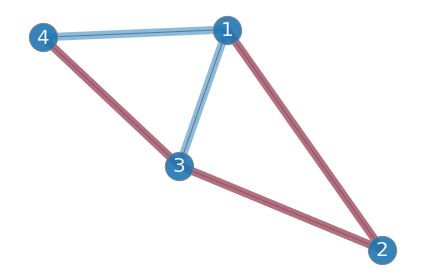

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
d = {1:[[2,2]]}
def create_networkx_graph(graph): 
    # pass dict graph
    g = nx.Graph()

    g.add_nodes_from(graph.keys())  # add nodes
    edges = []

    for i in graph.keys():              ## add edges
        for j in graph[i]:
            edge = (i, j[0], j[1])
            edges.append(edge)
        g.add_weighted_edges_from(edges)

    return g


def visualize(networkx_graph, g1):
    g = networkx_graph

    pos = nx.spring_layout(g, seed=3113794652)  # positions for all nodes

    options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
    nx.draw_networkx_nodes(g, pos, node_color="tab:blue", nodelist = list(g.nodes()), **options)
      # nx.draw_networkx_nodes(g1, pos, node_color="tab:red", nodelist = list(g1.nodes()), **options)
    nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_edges(g, pos, width=8.0, alpha=0.5, edge_color="tab:blue", edgelist = list(g.edges()))
    nx.draw_networkx_edges(g, pos, width=8.0, alpha=0.5, edge_color="tab:red", edgelist = [(1,2), (2,3), (3,4)])

    labels = {}
    for i in list(g.nodes()):
        labels[i] = i
    nx.draw_networkx_labels(g, pos, labels, font_size=20, font_color="whitesmoke")
    plt.tight_layout()
    plt.axis("off")
    plt.show()

g1 = create_networkx_graph(graph.graph)
g2 = create_networkx_graph(d)

visualize(g1, g2)

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
# Weighted graphs:
# Create a weighted graph:
# 0 is connected to 1 with weight 12, 
# 0 is connecetd to 2 wit weight 8.
# 1 is connected to 2 with weight 5,
# 2 is connected to 3 with weight 4,
# 2 is connected to 4 with weight 2.

edges = [(0,1, 12), (0,2, 8), (1,2, 5), (2,3, 4), (2,4, 2)]
graph = nx.Graph()

# graph.add_vertex(1)
# graph.add_vertex(2)
# graph.add_vertex(3)
# graph.add_vertex(4)
graph.add_edge(1, 2, 1)
graph.add_edge(1, 3, 1)
graph.add_edge(2, 3, 3)
graph.add_edge(3, 1, 4)
graph.add_edge(3, 4, 4)
graph.add_edge(4, 1, 5)
g = nx.draw(graph, weighted= True)
plt.show(edge_labels=True)


TypeError: add_edge() takes 3 positional arguments but 4 were given